
# <span style="color:rgb(213,80,0)">New features of FSDA 2025A</span>

[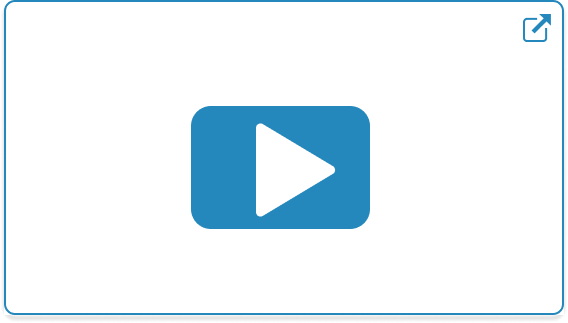](https://www.youtube.com/embed/yx569ZBGd58)


New redesigned app biplotAPP with support to robust principal components, interactive brushing and  interactive maps. For a detailed list of what's new in FSDA 2025a please see [http://rosa.unipr.it/FSDA/release\_notes.html](http://rosa.unipr.it/FSDA/release_notes.html)

## Example of call to pcaFS

Initial correlation matrix
                  addedval    depos    pensions    unemploy    export    bankrup    billsoverd
                  ________    _____    ________    ________    ______    _______    __________
    addedval        1.00       0.89      0.74       -0.80       0.56      0.06        -0.37   
    depos           0.89       1.00      0.73       -0.69       0.44      0.17        -0.24   
    pensions        0.74       0.73      1.00       -0.50       0.31      0.35        -0.29   
    unemploy       -0.80      -0.69     -0.50        1.00      -0.61      0.15         0.40   
    export          0.56       0.44      0.31       -0.61       1.00      0.04        -0.22   
    bankrup         0.06       0.17      0.35        0.15       0.04      1.00         0.46   
    billsoverd     -0.37      -0.24     -0.29        0.40      -0.22      0.46         1.00   
Explained variance by PCs
           Eigenvalues    Explained_Variance    Explained_Variance_cum
           __________


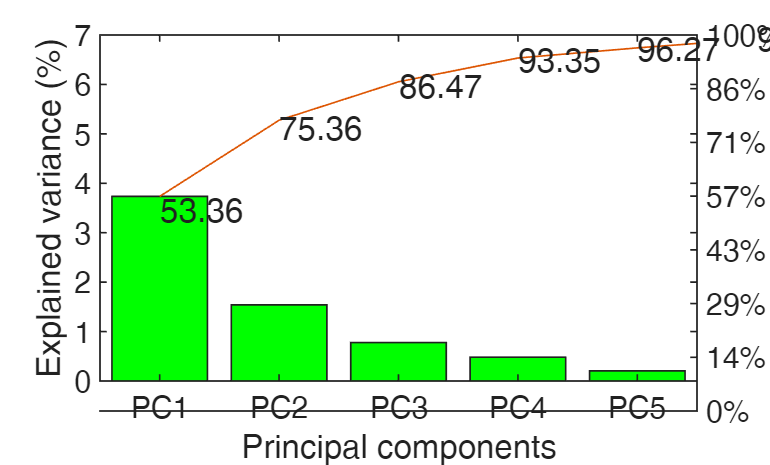


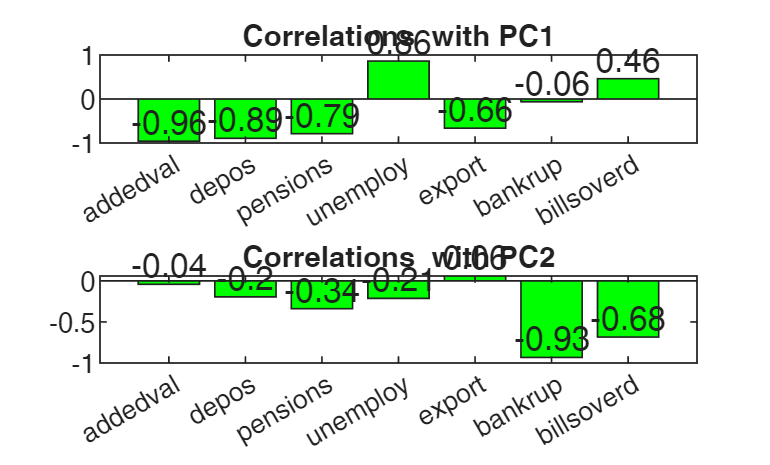

In [1]:
load citiesItaly.mat
out=pcaFS(citiesItaly);

<center>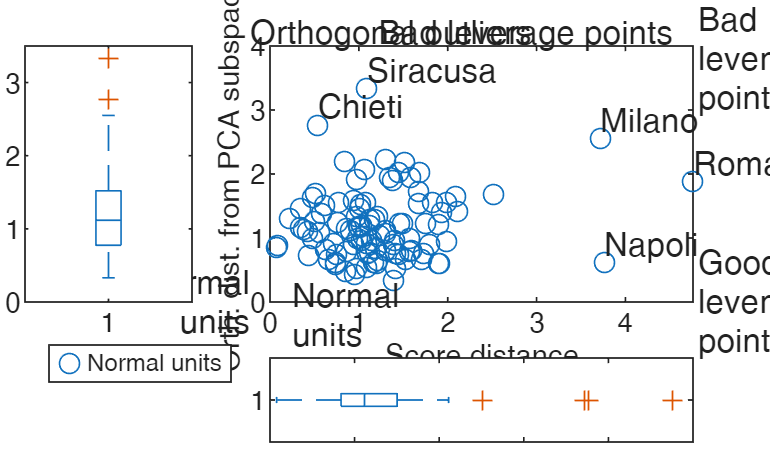</center>


<center>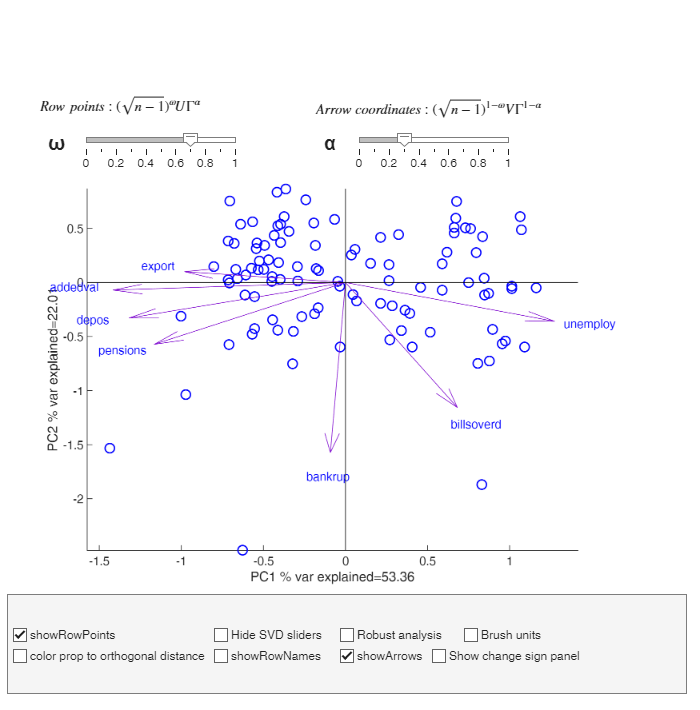</center>



## Example of call to pcaFS with latitude and longitude

The first PC already explains more than 0.95^v variability
In what follows we still extract the first 2 PCs
Initial correlation matrix
                 Deposit    Bankrup    UrbanFra    Paym30D    ElecPar    QualLif    Protest    SalaryA    SpendingA    Employm    AddedVa    LowISEE
                 _______    _______    ________    _______    _______    _______    _______    _______    _________    _______    _______    _______
    Deposit        1.00      -0.33      -0.70        0.72       0.58       0.76      -0.14       0.74        0.75        0.79       0.79      -0.76 
    Bankrup       -0.33       1.00       0.26       -0.39      -0.13      -0.44       0.33      -0.18       -0.22       -0.32      -0.24       0.40 
    UrbanFra      -0.70       0.26       1.00       -0.77      -0.74      -0.74       0.23      -0.74       -0.81       -0.90      -0.70       0.83 
    Paym30D        0.72      -0.39      -0.77        1.00       0.69       0.81      -0.35       0.74        0.79       


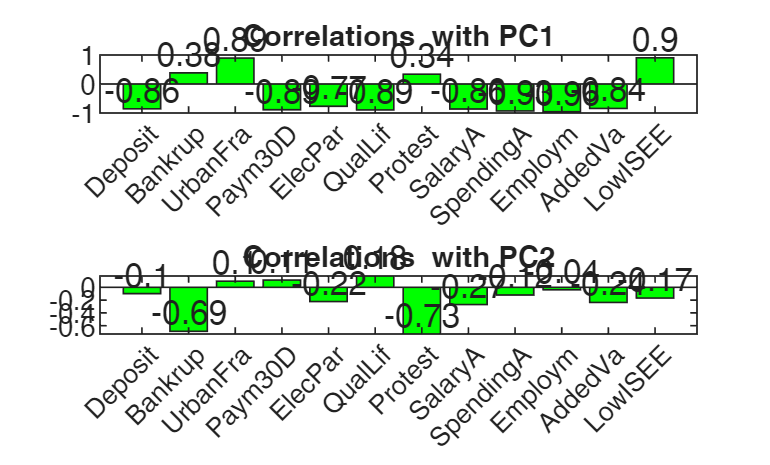


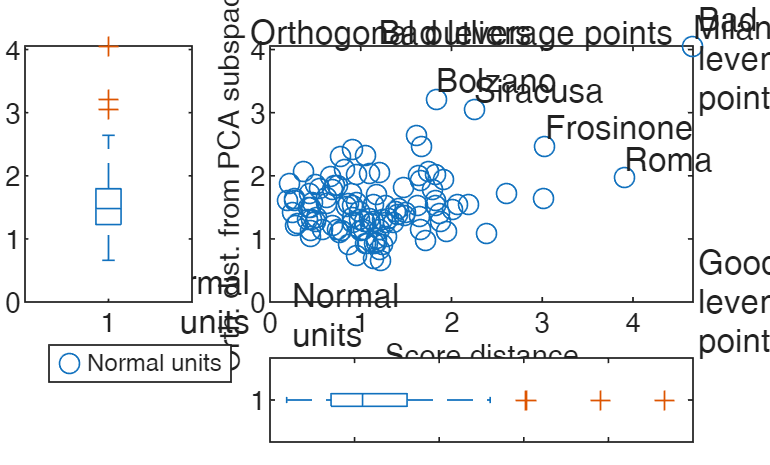

In [2]:
% Now latitude and longtude can be supplied to pcaFS using options.
% A geobubble plot is produced where the size of the bubbles is
% proportional to PC1 and the color is proportional to PC2
load citiesItaly2024.mat
X=citiesItaly2024;

% Retrieve Latitude and Longitude of each province
LatLong=X.Properties.UserData{2};
Latitude=LatLong(:,1);
Longitude=LatLong(:,2);
out=pcaFS(X,'Latitude',Latitude,'Longitude',Longitude);

<center>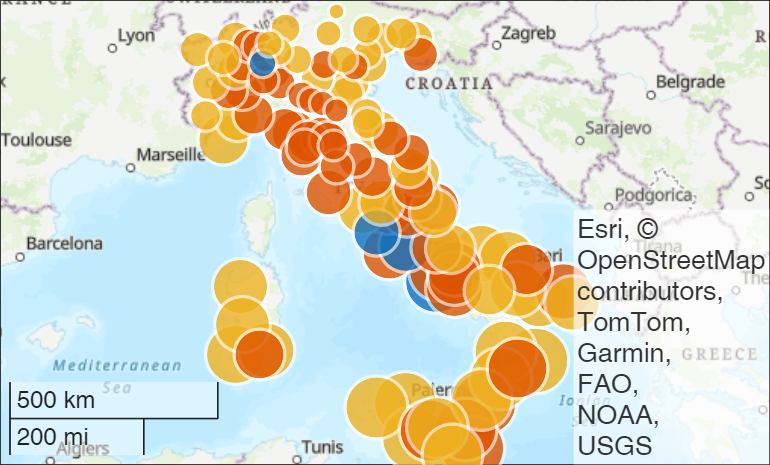</center>


<center>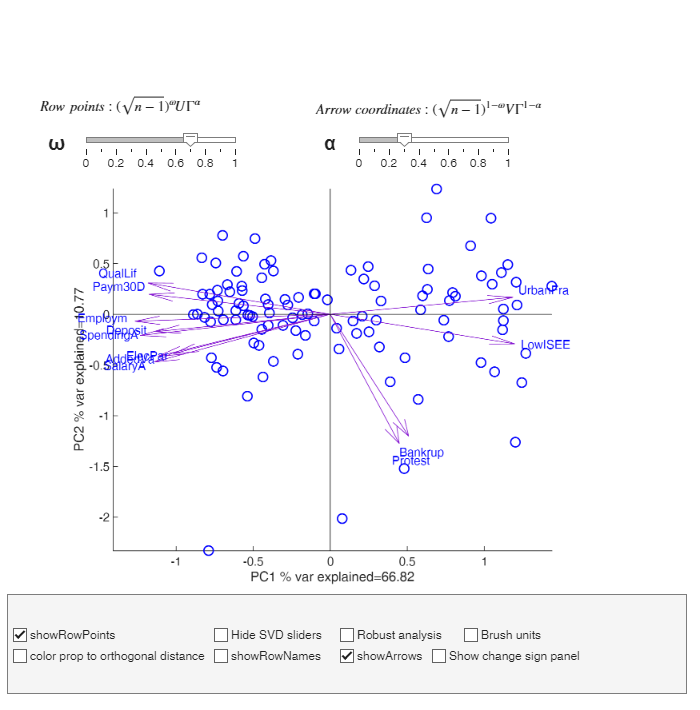</center>


<center>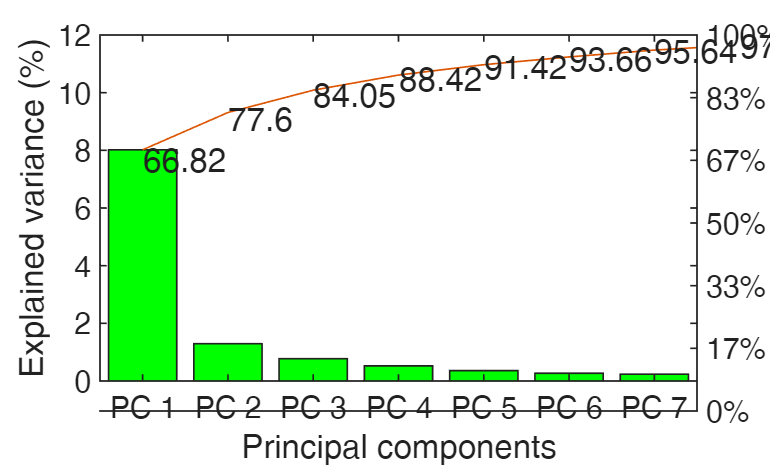</center>



## Example of call to pcaFS with ShapeFile

The first PC already explains more than 0.95^v variability
In what follows we still extract the first 2 PCs
Initial correlation matrix
                 Deposit    Bankrup    UrbanFra    Paym30D    ElecPar    QualLif    Protest    SalaryA    SpendingA    Employm    AddedVa    LowISEE
                 _______    _______    ________    _______    _______    _______    _______    _______    _________    _______    _______    _______
    Deposit        1.00      -0.33      -0.70        0.72       0.58       0.76      -0.14       0.74        0.75        0.79       0.79      -0.76 
    Bankrup       -0.33       1.00       0.26       -0.39      -0.13      -0.44       0.33      -0.18       -0.22       -0.32      -0.24       0.40 
    UrbanFra      -0.70       0.26       1.00       -0.77      -0.74      -0.74       0.23      -0.74       -0.81       -0.90      -0.70       0.83 
    Paym30D        0.72      -0.39      -0.77        1.00       0.69       0.81      -0.35       0.74        0.79       


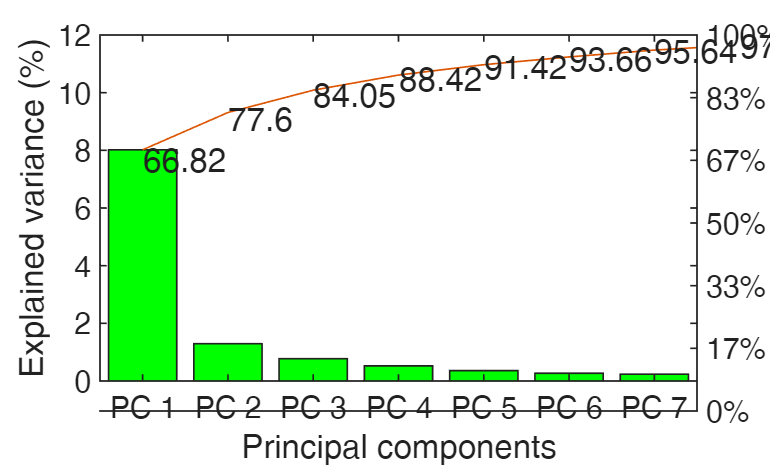


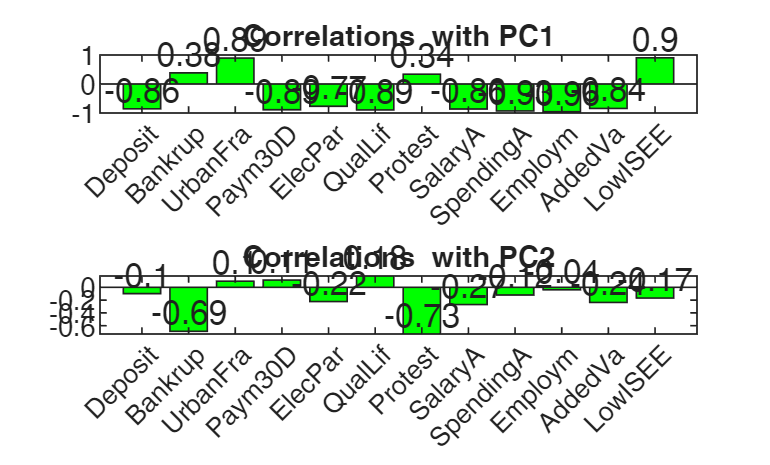

In [3]:
% If a Shape file is passed an interactive APP is automatically shown (in
% addition to all the other plots)
drawnow
close all
load citiesItaly2024.mat
X=citiesItaly2024;
ShapeFile=X.Properties.UserData{1};
out=pcaFS(X,'ShapeFile',ShapeFile);

<center>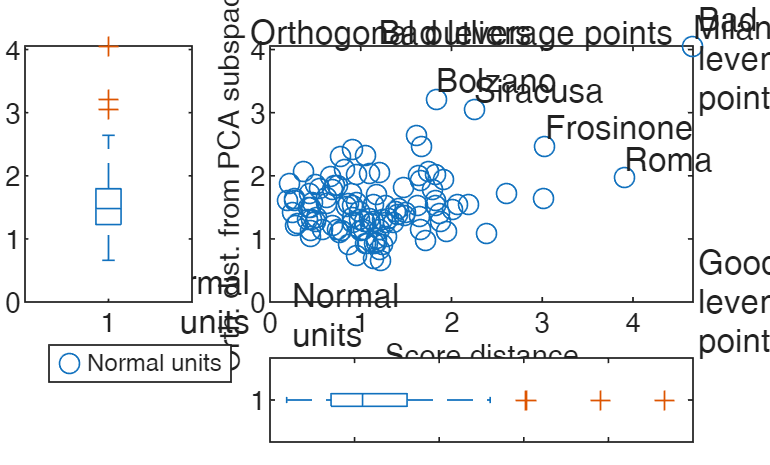</center>


<center>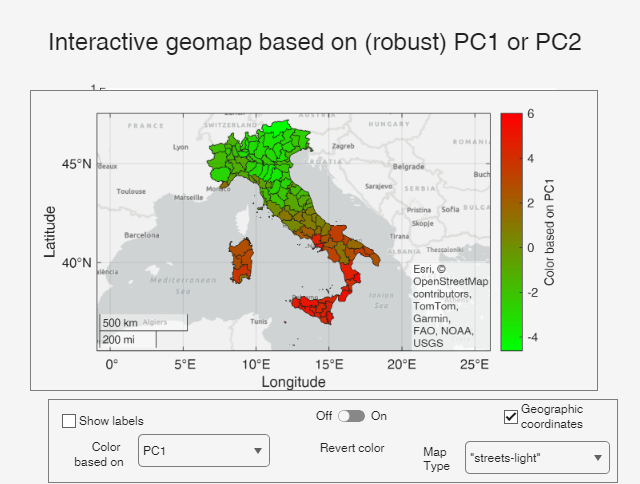</center>


<center>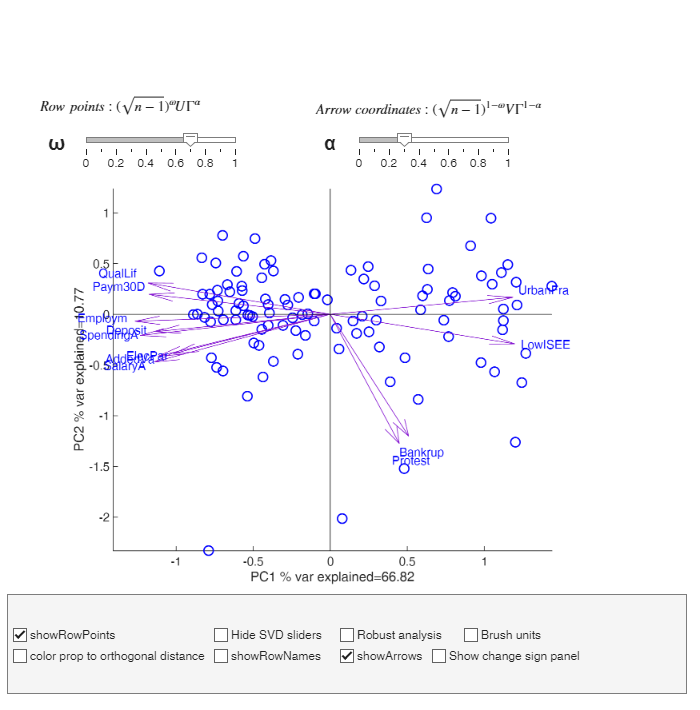</center>



## Example of call to geoplotFS


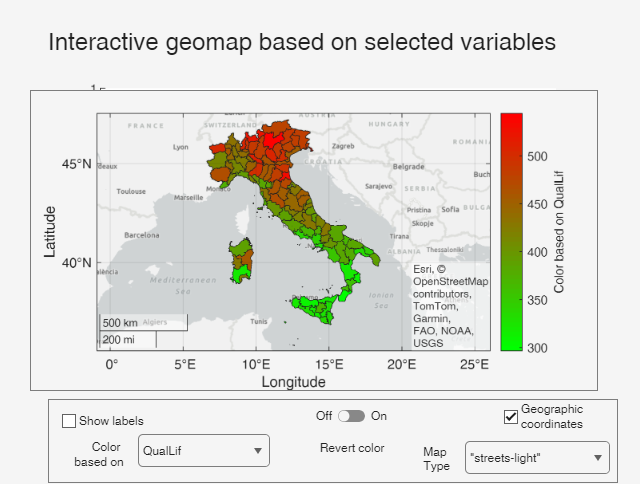

In [4]:
close all force
load citiesItaly2024.mat
ShapeFile=citiesItaly2024.Properties.UserData{1};
% In this case the selected variable is "Qualif"
geoplotFS(citiesItaly2024,"QualLif",ShapeFile)

## Example of call to corrNominal when input is a 2x2 table

In [5]:
% Indexes theta=cross product ratio,
% Q and U are also computed.
% X=advertisement memory (rows)
% Y=product purchase (columns)
N= [87 188;
    42 406];
nam=["Yes" "No"];
Ntable=array2table(N,"RowNames",nam,"VariableNames",nam);
disp('Input 2x2 contingency table')

Input 2x2 contingency table

In [6]:
disp(table(Ntable,RowNames=["X=advertisement memory" "advertisement memory "],VariableNames="Y=Product purchase"))

                              Y=Product purchase
                              __________________
                                     Yes    No  
                                     ___    ___ 
                                                
    X=advertisement memory    Yes    87     188 
    advertisement memory      No     42     406

In [7]:
out=corrNominal(Ntable);

Chi2 index
   57.6071
pvalue Chi2 index
   3.2006e-14
Phi index
    0.2823
Cramer's V 
    0.2823
-------------------------------
2x2 contingency table indexes
th=cross product ratio
    4.4734
Cross product ratio in the interval [-1 1]. Index Q=(th-1)/(th+1)
    0.6346
Cross product ratio in the interval [-1 1]. Index U=(sqrt(th)-1)/(sqrt(th)+1)
    0.3580
-------------------------------
Test of H_0: independence between rows and columns
                   Coeff         se       zscore       pval   
                  ________    ________    ______    __________
    CramerV        0.28227    0.037189    7.5902    3.1974e-14
    GKlambdayx           0           0       NaN           NaN
    tauyx         0.079678    0.020787    3.8331    0.00012653
    Hyx           0.082782    0.021327    3.8816    0.00010376
-----------------------------------------
Indexes and 95% confidence limits
                   Value      StandardError    ConflimL    ConflimU
                  ________    _____



## Example of call to corrNominal when input is a IxJ table and contribution of each cell to final index is required


Chi2 index
  419.5540
pvalue Chi2 index
   7.0846e-67
Phi index
    0.4541
Cramer's V 
    0.2270
Test of H_0: independence between rows and columns
                   Coeff         se        zscore       pval   
                  ________    _________    ______    __________
    CramerV        0.22703     0.016291    13.936             0
    GKlambdayx     0.10888     0.014338    7.5941    3.1086e-14
    tauyx         0.058767    0.0055956    10.502             0
    Hyx           0.065427    0.0060043    10.897             0
-----------------------------------------
Indexes and 95% confidence limits
                   Value      StandardError    ConflimL    ConflimU
                  ________    _____________    ________    ________
    CramerV        0.22703       0.016291        0.1951     0.23953
    GKlambdayx     0.10888       0.014338      0.080782     0.13699
    tauyx         0.058767      0.0055956        0.0478    0.069734
    Hyx           0.065427      0.0060043      0.05


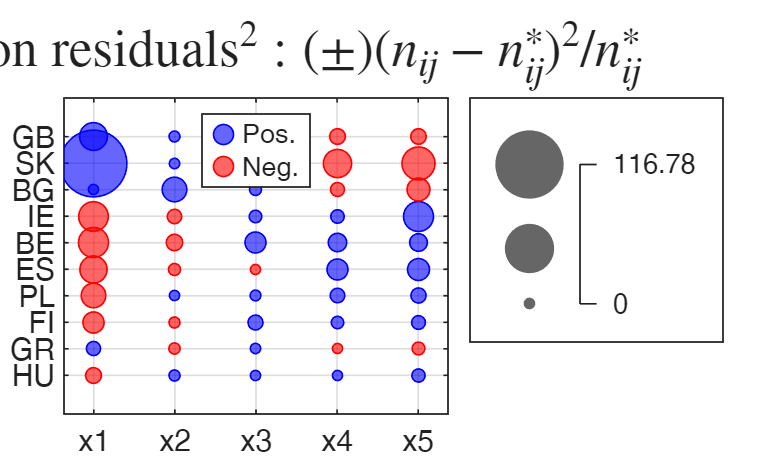


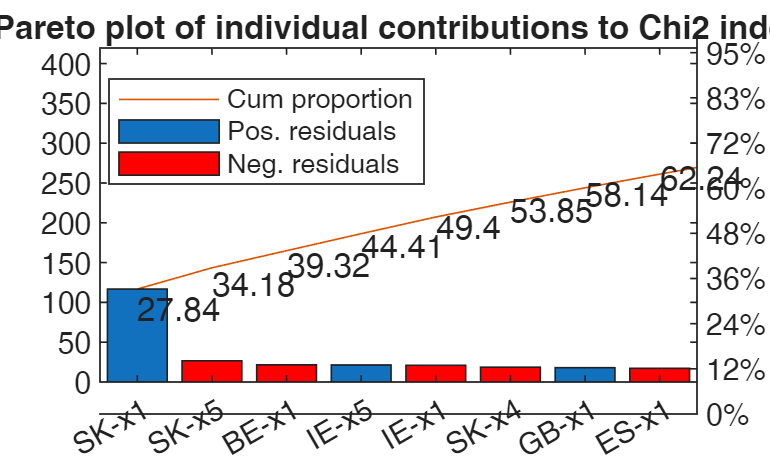

In [8]:
close all
load clothes.mat
% For didactic purposes we just use the first 10 rows of clothes
out=corrNominal(clothes(1:10,:),'plots',1);


## New option contrib2Index inside [balloonplot](http://rosa.unipr.it/FSDA/balloonplot.html)

The contribution of each cell of the contingency table can ba easily visualized by function balloonplot using option contrib2index


In [9]:
load SportHealth.mat
out=corrNominal(SportHealth);

Chi2 index
  104.4294
pvalue Chi2 index
1.9934e-18
Phi index
    0.5871
Cramer's V 
    0.3389
Test of H_0: independence between rows and columns
                   Coeff        se       zscore       pval   
                  _______    ________    ______    __________
    CramerV       0.33895    0.040732    8.3214             0
    GKlambdayx    0.19307    0.044247    4.3634    1.2803e-05
    tauyx         0.11153    0.021133    5.2774    1.3104e-07
    Hyx           0.12654    0.022713    5.5711     2.531e-08
-----------------------------------------
Indexes and 95% confidence limits
                   Value     StandardError    ConflimL    ConflimU
                  _______    _____________    ________    ________
    CramerV       0.33895      0.040732        0.25911    0.39187 
    GKlambdayx    0.19307      0.044247        0.10635    0.27979 
    tauyx         0.11153      0.021133       0.070107    0.15295 
    Hyx           0.12654      0.022713       0.082019    0.17105

In [10]:
out.Contrib2Hyxtable


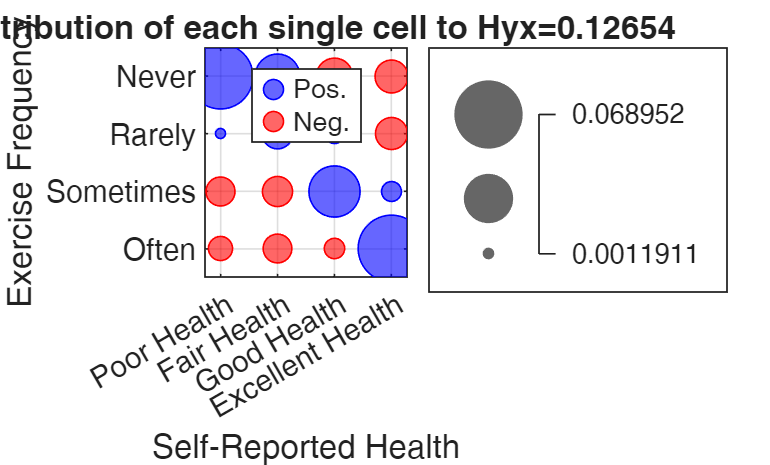

In [11]:
% Contribution to Hyx index from each cell of the table
balloonplot(SportHealth,'contrib2Index', out.Contrib2Hyxtable);
title(['Contribution of each single cell to Hyx=' num2str(out.Hyx(1))])

In [12]:
% Note that the legend are interactive. Clicking on "Pos." or "Neg." it is
% possible to hide/how the associated circles.


## New option order inside spmplot to improve the visualization by placing similar variables next to each other.


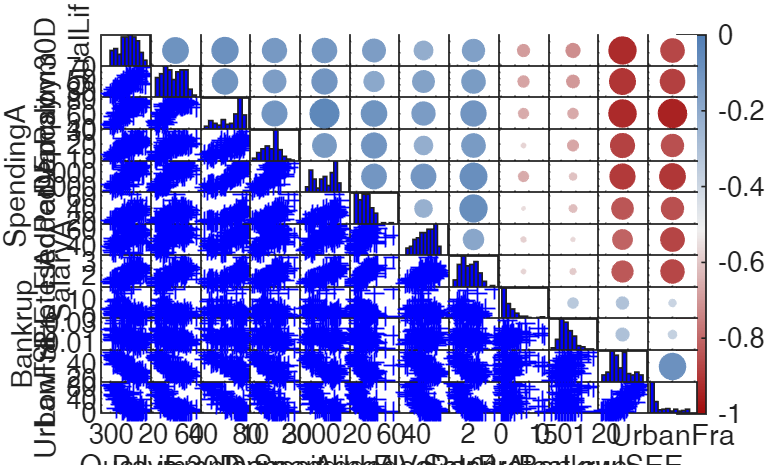

In [13]:
%% Order by the first 2 eigenvectors
load citiesItaly2024.mat
typespm=struct;
% Show the scatter in the upper part as circles
typespm.upper='circle';
% Show scatters in the lower part
typespm.lower='scatter';
% Use order of the variable based on the first two eigenvectors
spmplot(citiesItaly2024,'typespm',typespm,'order','AOE');


The above plot clearly shows that there are 8 variables which have a strong positive correlations.


These 8 variable variables are scarsely correlated with the two variables referres to Protest and Bankruptcy indicators.


Finally, the above 8 variables have a strong negative correlation with the two variables Urban Fragility and LowISEE. For a more detailed description of this dataset please see the dataset page of FSDA [http://rosa.unipr.it/FSDA/datasets\_mv.html](http://rosa.unipr.it/FSDA/datasets_mv.html)



Add a background color depending on the magniture of correlation and a boxplot on the main diagonal



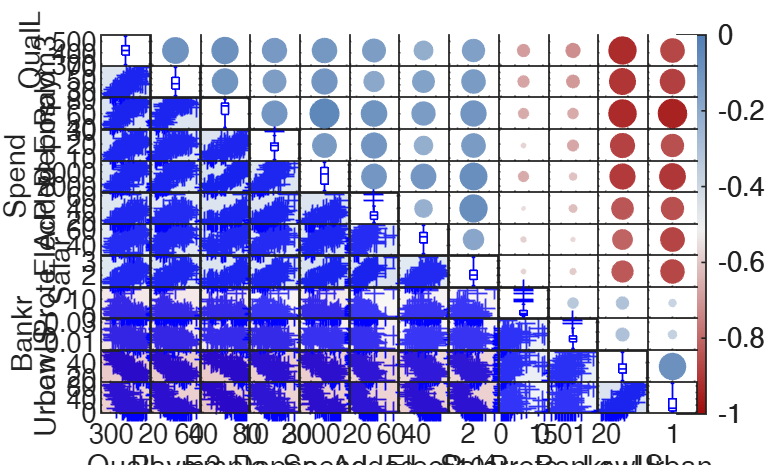

In [14]:
typespm=struct;
typespm.upper='circle';
% Add a backgroud color using option 'colorBackground', truncate the length
% of the name of the variables to 5 with option 'nameYlength' and show
% boxplot in the main diagonal using option 'dispopt'
spmplot(citiesItaly2024,'order','AOE','typespm',typespm,'colorBackground',true, ...
    'nameYlength',5,'dispopt','box');